In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('../data/raw/Base_dados - Rotatividade RH.xlsx', engine = 'openpyxl')
df.columns= [x.lower() for x in df.columns]
df.head()

#url = 'https://github.com/matheusmello-o/turnover-optmization/raw/refs/heads/main/Base_dados%20-%20Rotatividade%20RH.xlsx'

# df = pd.read_excel(url, engine = 'openpyxl')
# df.columns = [x.lower() for x in df.columns]
# df.head()

,data_contratacao,data_desligamento,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,nivel_cargo,salario,horas_extras,desligamento
0,2024-02-14,NaT,3,24,2.066788,2.043644,Pleno,4994.41,15.465241,0
1,2023-11-16,2024-05-14,6,43,3.256257,1.711719,Sênior,8798.34,19.036627,1
2,2023-11-16,NaT,6,45,4.827732,3.480214,Sênior,8891.02,13.326408,0
3,2023-05-20,NaT,12,31,1.453944,1.617558,Pleno,7606.22,14.209663,0
4,2022-07-24,NaT,22,37,2.088917,2.763390,Sênior,9236.03,11.059687,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   data_contratacao      650 non-null    datetime64[ns]
 1   data_desligamento     144 non-null    datetime64[ns]
 2   meses_de_servico      650 non-null    int64         
 3   idade                 650 non-null    int64         
 4   pontuacao_desempenho  650 non-null    float64       
 5   satisfacao_trabalho   650 non-null    float64       
 6   nivel_cargo           650 non-null    object        
 7   salario               650 non-null    float64       
 8   horas_extras          650 non-null    float64       
 9   desligamento          650 non-null    int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 50.9+ KB


In [13]:
df['data_contratacao'] = df.data_contratacao.dt.date
df['data_desligamento'] = df.data_desligamento.dt.date

In [14]:
df.describe()

,meses_de_servico,idade,pontuacao_desempenho,satisfacao_trabalho,salario,horas_extras,desligamento
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,18.690769,28.349231,3.027463,2.940577,6131.587062,10.098864,0.221538
std,9.652262,8.014983,1.174226,1.148514,2689.075566,6.242406,0.415602
min,3.000000,18.000000,1.000242,1.002868,2004.500000,0.003734,0.000000
25%,10.000000,22.000000,1.988753,1.968571,4023.752500,4.978000,0.000000
50%,19.000000,27.000000,3.058911,2.923458,5562.950000,9.413546,0.000000
75%,27.000000,33.000000,4.022709,3.964356,7814.480000,14.749310,0.000000
max,35.000000,49.000000,4.992102,4.999415,11957.290000,41.638350,1.000000


array([[<Axes: title={'center': 'meses_de_servico'}>,
        <Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'pontuacao_desempenho'}>],
       [<Axes: title={'center': 'satisfacao_trabalho'}>,
        <Axes: title={'center': 'salario'}>,
        <Axes: title={'center': 'horas_extras'}>],
       [<Axes: title={'center': 'desligamento'}>, <Axes: >, <Axes: >]],
      dtype=object)

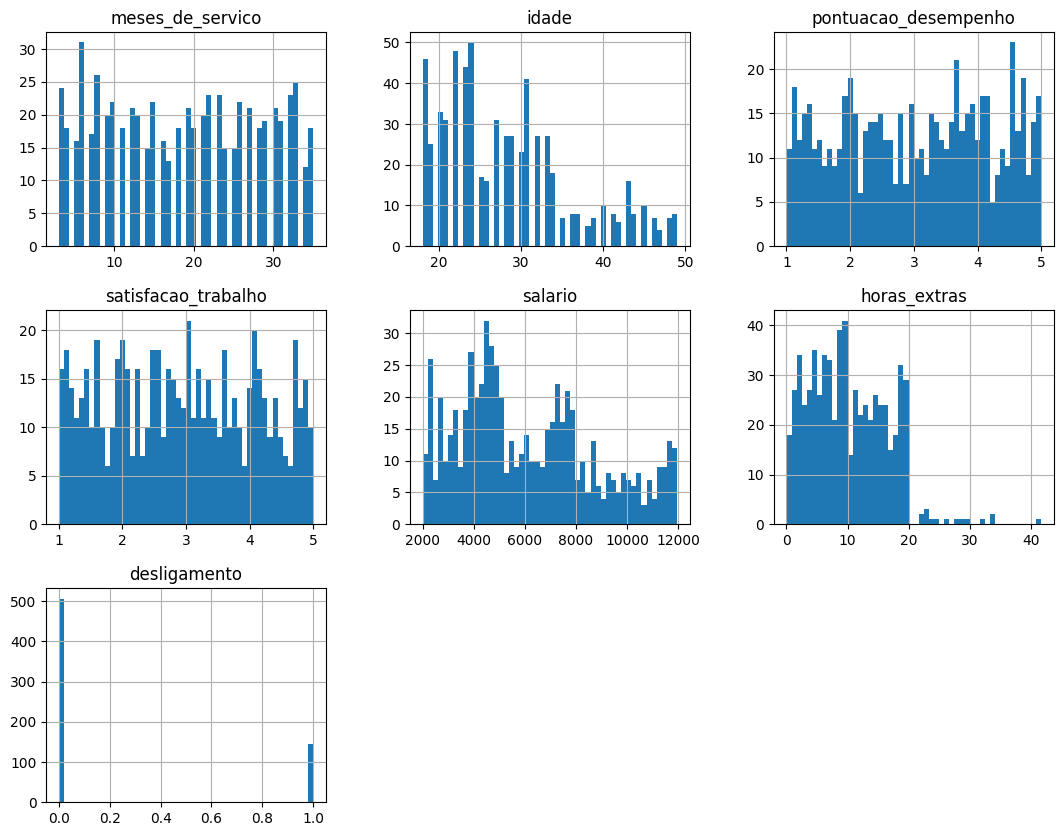

In [16]:
df.hist(figsize=(13, 10), bins = 50)

# <font color = 'gold'> Separating - Train and Test samples </font>

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# def strat_func(df):
# 	df = df.copy()
# 	shuffle = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)
# 	for train_index, test_index in shuffle.split(X = df, y = df.desligamento):
# 		train_set = df.loc[train_index]
# 		test_set = df.loc[test_index]
# 	return train_set, test_set

# train_set, test_set = strat_func(df)

# <font color = 'gold'> Exploratory Data Analysis </font>

In [14]:
# checking null data
df.isnull().sum()

data_contratacao          0
data_desligamento       506
meses_de_servico          0
idade                     0
pontuacao_desempenho      0
satisfacao_trabalho       0
nivel_cargo               0
salario                   0
horas_extras              0
desligamento              0
dtype: int64

In [15]:
df.nunique()

data_contratacao         33
data_desligamento         1
meses_de_servico         33
idade                    32
pontuacao_desempenho    650
satisfacao_trabalho     650
nivel_cargo               3
salario                 650
horas_extras            540
desligamento              2
dtype: int64

In [16]:
# checking negative numbers
(df.select_dtypes(include = np.number) < 0).any()

meses_de_servico        False
idade                   False
pontuacao_desempenho    False
satisfacao_trabalho     False
salario                 False
horas_extras            False
desligamento            False
dtype: bool

In [ ]:
df.desligamento.value_counts(normalize = True)

desligamento
0    0.778462
1    0.221538
Name: proportion, dtype: float64

<Axes: >

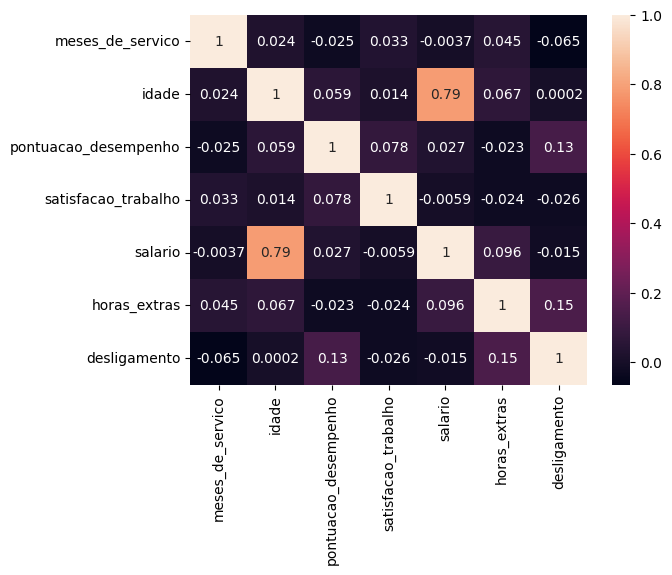

In [3]:
cperson = df.corr(method = 'spearman', numeric_only = True)
sns.heatmap(data = cperson, annot = True)

<Axes: xlabel='desligamento', ylabel='salario'>

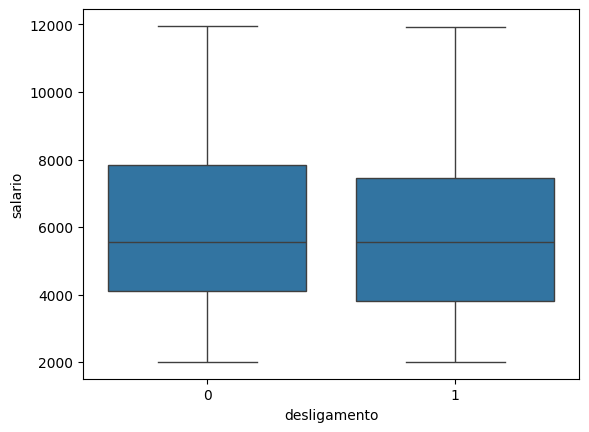

In [19]:
sns.boxplot(data = df,
            x = 'desligamento',
            y = 'salario')

<Axes: xlabel='desligamento', ylabel='horas_extras'>

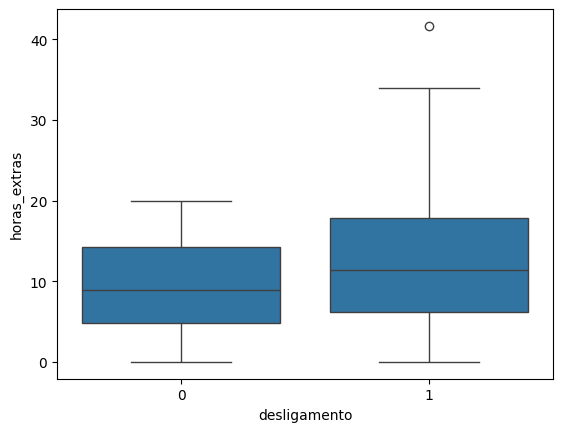

In [9]:
sns.boxplot(data = df,
            x = 'desligamento',
            y = 'horas_extras')

<Axes: xlabel='nivel_cargo', ylabel='salario'>

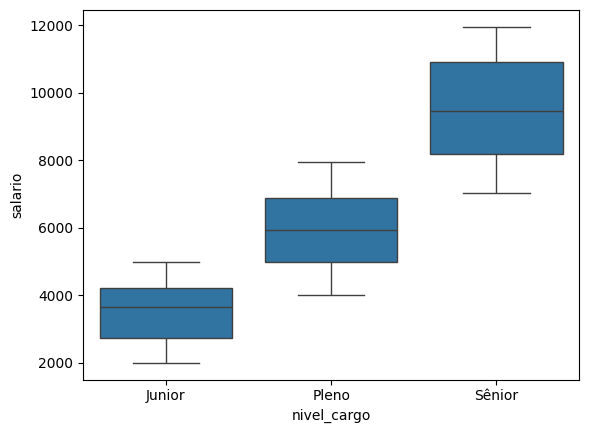

In [ ]:
sns.boxplot(data = df,
            x = 'nivel_cargo',
            y = 'salario',
            order = ['Junior', 'Pleno', 'Sênior'])

<Axes: xlabel='nivel_cargo', ylabel='pontuacao_desempenho'>

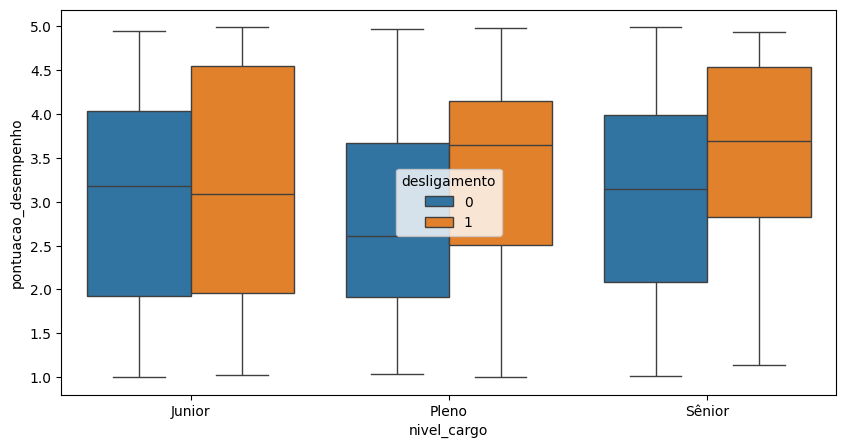

In [6]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df,
            x = 'nivel_cargo',
            y = 'pontuacao_desempenho',
            hue = 'desligamento',
            order = ['Junior', 'Pleno', 'Sênior'])

<Axes: xlabel='nivel_cargo', ylabel='satisfacao_trabalho'>

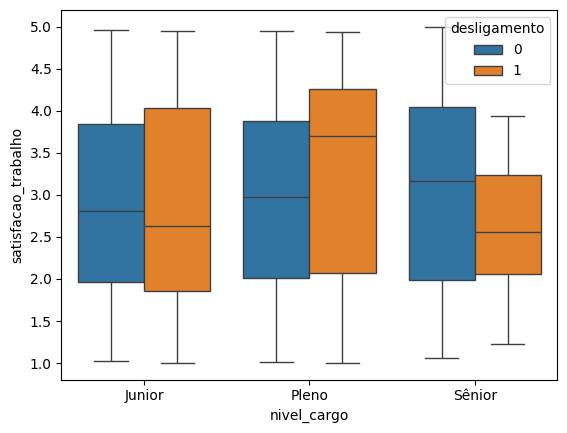

In [12]:
sns.boxplot(data = df,
            x = 'nivel_cargo',
            y = 'satisfacao_trabalho',
            hue = 'desligamento',
            order = ['Junior', 'Pleno', 'Sênior'])

<Axes: xlabel='meses_de_servico', ylabel='satisfacao_trabalho'>

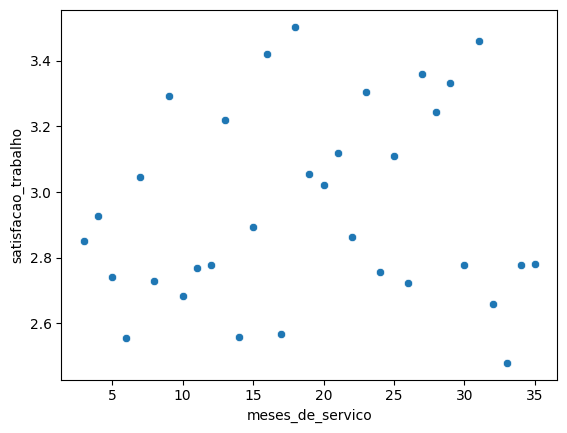

In [7]:
satisfacao_trabalho_meses_servico = df.groupby(['meses_de_servico']).satisfacao_trabalho.mean().reset_index()
sns.scatterplot(data = satisfacao_trabalho_meses_servico,
                x = 'meses_de_servico',
                y = 'satisfacao_trabalho')

Text(0.5, 1.0, 'Média da Satisfacao no Trabalho por Meses de Serviço')

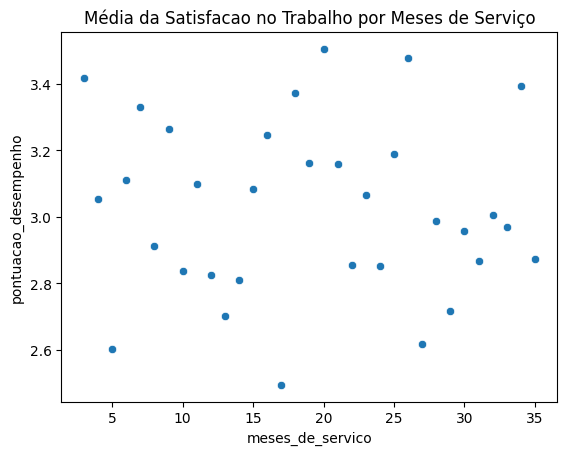

In [24]:
satisfacao_trabalho_meses_servico = df.groupby(['meses_de_servico']).pontuacao_desempenho.mean().reset_index()
sns.scatterplot(data = satisfacao_trabalho_meses_servico,
                x = 'meses_de_servico',
                y = 'pontuacao_desempenho')
plt.title('Média da Satisfacao no Trabalho por Meses de Serviço')

Text(0.5, 1.0, 'Média da Pontuacao de Desempenho no Trabalho por Anos de Serviço')

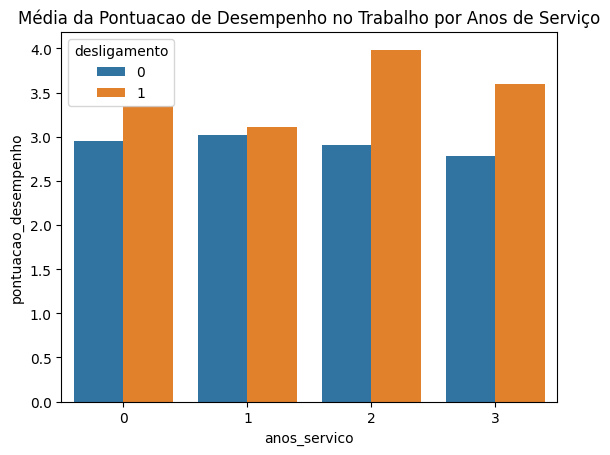

In [15]:
df['anos_servico'] = ((df.meses_de_servico / 12) + 0.5).astype(int)
desempenho_trabalho_anos_servico = df.groupby(['anos_servico', 'desligamento']).pontuacao_desempenho.median().reset_index()
sns.barplot(data = desempenho_trabalho_anos_servico,
                x = 'anos_servico',
                y = 'pontuacao_desempenho',
                hue = 'desligamento'
                )
plt.title('Média da Pontuacao de Desempenho no Trabalho por Anos de Serviço')

Text(0.5, 1.0, 'Média da Satisfacao no Trabalho por Anos de Serviço')

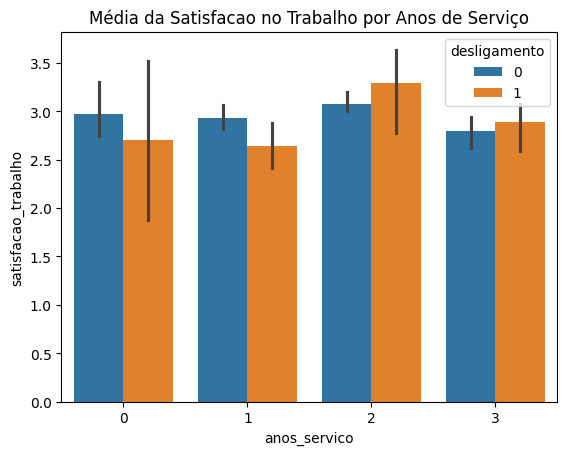

In [20]:
satisfacao_trabalho_anos_servico = df.groupby(['anos_servico', 'desligamento', 'nivel_cargo']).satisfacao_trabalho.mean().reset_index()
sns.barplot(data = satisfacao_trabalho_anos_servico,
                x = 'anos_servico',
                y = 'satisfacao_trabalho',
                hue = 'desligamento')
plt.title('Média da Satisfacao no Trabalho por Anos de Serviço')

In [27]:
df.groupby(['nivel_cargo']).horas_extras.describe()

,count,mean,std,min,25%,50%,75%,max
nivel_cargo,,,,,,,,
Junior,233.0,9.647388,5.668092,0.055160,4.978000,9.237052,14.517873,19.782426
Pleno,225.0,9.145124,5.370939,0.089801,4.864951,8.711500,13.626713,19.984160
Sênior,192.0,11.764412,7.446130,0.003734,5.769785,10.992808,16.583765,41.638350


In [28]:
11.764412 / 9.145124 - 1

0.2864136123249943

In [29]:
df.groupby(['nivel_cargo']).salario.describe()

,count,mean,std,min,25%,50%,75%,max
nivel_cargo,,,,,,,,
Junior,233.0,3518.537597,867.242397,2004.5,2736.83,3651.15,4211.0100,4993.31
Pleno,225.0,5965.735600,1139.341233,4008.9,5002.69,5929.33,6897.9300,7958.43
Sênior,192.0,9496.988646,1545.201484,7027.6,8175.41,9448.30,10926.5575,11957.29


In [38]:
satisfacao_tempo = df.groupby('data_contratacao').agg(
    contagem_colaboradores = ('salario', 'size'),
    media_satisfacao = ('satisfacao_trabalho', 'mean'),
    media_desempenho = ('pontuacao_desempenho', 'mean')
).reset_index().sort_values(by = 'data_contratacao')

<Axes: xlabel='data_contratacao', ylabel='media_satisfacao'>

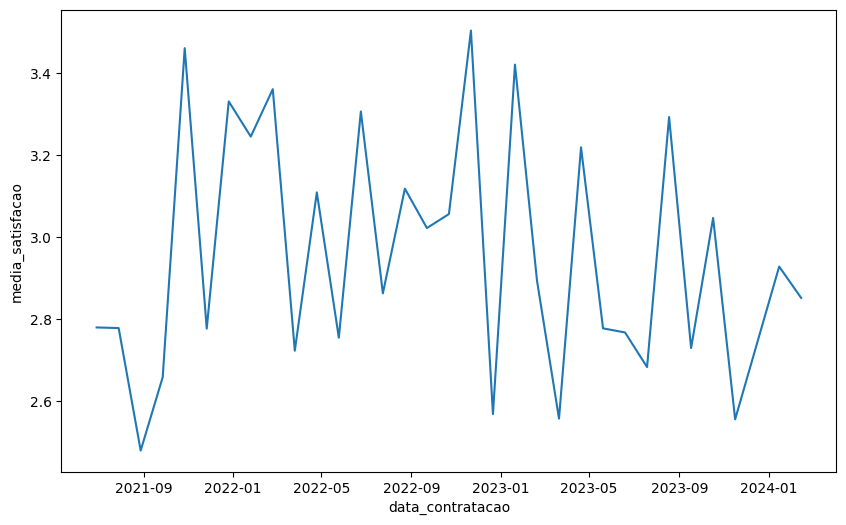

In [43]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = satisfacao_tempo,
            x = 'data_contratacao',
            y = 'media_satisfacao',
            )

## Seniors Analysis

In [21]:
df_senior = df.loc[df.nivel_cargo == 'Sênior'].copy()